In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import matplotlib.pyplot as plt
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import minpy.numpy as np
import load_data
num_val = 10000
num_train = 60000 - num_val
num_test = 10000
batch_size = 128
cifar_path = 'Datasets/cifar-10/'
mnist_path = 'Datasets/mnist/'

def get_data(path,num_train,num_val,num_test):
    x_train,y_train,x_test,y_test = load_data.load_MNIST(path)
    x_val = x_train[num_train:num_train+num_val]
    y_val = y_train[num_train:num_train+num_val]
    y_val = y_val.reshape(y_val.shape[0])
    x_train = x_train[:num_train]
    y_train = y_train[:num_train]
    y_train = y_train.reshape(y_train.shape[0])
    x_test = x_test[:num_test]
    y_test = y_test[:num_test]
    y_test = y_test.reshape(y_test.shape[0])
    return x_train,y_train,x_val,y_val,x_test,y_test
x_train,y_train,x_val,y_val,x_test,y_test = get_data(mnist_path,num_train,num_val,num_test)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

_,H,W = x_train.shape
D = H * W
data = (x_train.reshape(x_train.shape[0],D), y_train, 
        x_val.reshape(x_val.shape[0],D), y_val, 
        x_test.reshape(x_test.shape[0],D), y_test)
# data = (x_train.reshape(x_train.shape[0],D), np.reshape(y_train,(y_train.shape[0], 1)),
#         x_val.reshape(x_val.shape[0],D), np.reshape(y_val, (y_val.shape[0], 1)), 
#         x_test.reshape(x_test.shape[0],D), np.reshape(y_test, (y_test.shape[0], 1)))

I0707 20:08:12 21801 minpy.numpy.random:__init__:30] Initialize module: minpy.numpy.random.
I0707 20:08:12 21801 minpy.numpy.random:__init__:38] Importing from minpy.array_variants.numpy.random.
I0707 20:08:12 21801 minpy.numpy.random:__init__:45] Got 53 primitives from minpy.array_variants.numpy.random
I0707 20:08:12 21801 minpy.numpy.random:__init__:38] Importing from minpy.array_variants.mxnet.random.
I0707 20:08:12 21801 minpy.numpy.random:__init__:45] Got 2 primitives from minpy.array_variants.mxnet.random
I0707 20:08:12 21801 minpy.numpy.random:__init__:50] Import 55 primitives
I0707 20:08:12 21801 minpy.numpy:__init__:30] Initialize module: minpy.numpy.
I0707 20:08:12 21801 minpy.numpy:__init__:38] Importing from minpy.array_variants.numpy.
I0707 20:08:12 21801 minpy.numpy:__init__:45] Got 396 primitives from minpy.array_variants.numpy
I0707 20:08:12 21801 minpy.numpy:__init__:38] Importing from minpy.array_variants.mxnet.
I0707 20:08:12 21801 minpy.numpy:__init__:45] Got 36 pri

train-images-idx3-ubyte.pkl exits
train-labels-idx1-ubyte.pkl exits
t10k-images-idx3-ubyte.pkl exits
t10k-labels-idx1-ubyte.pkl exits
(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


In [3]:
from model_zoo import *
from solver import *

mlp_setting = {
    'model_structure': [784, 256, 64, 10],
    'act_mode': ['relu', 'relu'],
    'device': 1,
    'weight_init': 0.05,
    'lower_bound': -0.01,
    'upper_bound': 0.01,
    'record_activation': True,
    'record_parameters': True
}
model = mlp(**mlp_setting)

solver_setting = {
    'epoch': 30,
    'batch_size': 50,
    'decay_rate': 0.9,
    'decay_interval': 5,
    'optimizer': 'sgd',
    'update_setting': {'learning_rate': 0.16},
}
solver = Solver(model, data, **solver_setting)
accuracy_record, loss_record = solver.train()
print accuracy_record

I0707 20:08:12 21801 minpy.numpy:__getattr__:69] No entry found for "random" in registry, fallback.
I0707 20:08:12 21801 minpy.numpy:__getattr__:69] No entry found for "random" in registry, fallback.
I0707 20:08:12 21801 minpy.numpy:__getattr__:69] No entry found for "random" in registry, fallback.


epoch 0 batch 0 loss: 2.297595
epoch 0 batch 50 loss: 0.680818
epoch 0 batch 100 loss: 0.522200
epoch 0 batch 150 loss: 0.517276
epoch 0 batch 200 loss: 0.488856
epoch 0 batch 250 loss: 0.724133
epoch 0 batch 300 loss: 0.214209
epoch 0 batch 350 loss: 0.324699
epoch 0 batch 400 loss: 0.425613
epoch 0 batch 450 loss: 0.508723
epoch 0 batch 500 loss: 0.124791
epoch 0 batch 550 loss: 0.326237
epoch 0 batch 600 loss: 0.284143
epoch 0 batch 650 loss: 0.122931
epoch 0 batch 700 loss: 0.065547
epoch 0 batch 750 loss: 0.291996
epoch 0 batch 800 loss: 0.101046
epoch 0 batch 850 loss: 0.419644
epoch 0 batch 900 loss: 0.151872
epoch 0 batch 950 loss: 0.148101
epoch 0 validation accuracy: 0.955500
optimal accuracy: 0.955500
test accuracy: 0.945700
epoch 1 batch 0 loss: 0.099341
epoch 1 batch 50 loss: 0.038734
epoch 1 batch 100 loss: 0.095053
epoch 1 batch 150 loss: 0.174871
epoch 1 batch 200 loss: 0.269789
epoch 1 batch 250 loss: 0.238668
epoch 1 batch 300 loss: 0.098784
epoch 1 batch 350 loss: 0.

In [4]:
import os, pickle
import flags
import utils
dirs = 'Log/'
activation_record = []
parameter_record = []
for epoch in range(solver_setting['epoch']):
    activation_record.append(pickle.load(open('%s%s-epoch-%d_activation.pkl' % (dirs, flags.NAME, epoch), 'rb')))
    parameter_record.append(pickle.load(open('%s%s-epoch-%d_parameter.pkl' % (dirs, flags.NAME, epoch), 'rb')))

layer_mean = {'fc1':[],'ac1':[],'fc2':[],'ac2':[],'fc3':[]}
layer_deviation = {'fc1':[],'ac1':[],'fc2':[],'ac2':[],'fc3':[]}
layer_sparsity = {'fc1':[],'ac1':[],'fc2':[],'ac2':[],'fc3':[]}
layer_deactivated = {'ac1':np.zeros(activation_record[0]['ac1'].shape), 
                     'ac2':np.zeros(activation_record[0]['ac2'].shape)}
for layer in activation_record:
    layer_mean['fc1'].append(utils.get_mean(layer['fc1']))
    layer_deviation['fc1'].append(utils.get_std_deviation(layer['fc1']))
    layer_sparsity['fc1'].append(utils.get_sparsity(layer['fc1']))
    
    layer_mean['ac1'].append(utils.get_mean(layer['ac1']))
    layer_deviation['ac1'].append(utils.get_std_deviation(layer['ac1']))
    layer_sparsity['ac1'].append(utils.get_sparsity(layer['ac1']))
    layer_deactivated['ac1'][layer['ac1'] == 0] += 1
    
    layer_mean['fc2'].append(utils.get_mean(layer['fc2']))
    layer_deviation['fc2'].append(utils.get_std_deviation(layer['fc2']))
    layer_sparsity['fc2'].append(utils.get_sparsity(layer['fc2']))
    
    layer_mean['ac2'].append(utils.get_mean(layer['ac2']))
    layer_deviation['ac2'].append(utils.get_std_deviation(layer['ac2']))
    layer_sparsity['ac2'].append(utils.get_sparsity(layer['ac2']))
    layer_deactivated['ac2'][layer['ac2'] == 0] += 1
    
    layer_mean['fc3'].append(utils.get_mean(layer['fc3']))
    layer_deviation['fc3'].append(utils.get_std_deviation(layer['fc3']))
    layer_sparsity['fc3'].append(utils.get_sparsity(layer['fc3']))
num_batch = len(loss_record)
num_epoch = solver_setting['epoch']

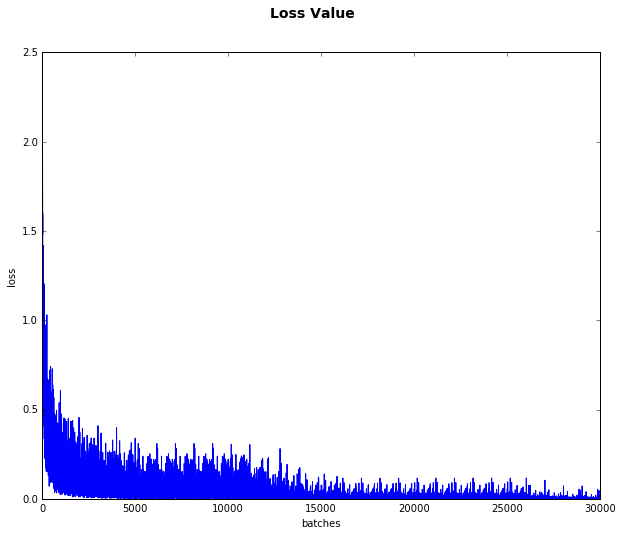

In [5]:
# loss
plt.plot(range(num_batch), loss_record)
plt.suptitle('Loss Value', fontsize=14, fontweight='bold')
plt.xlabel('batches')
plt.ylabel('loss')

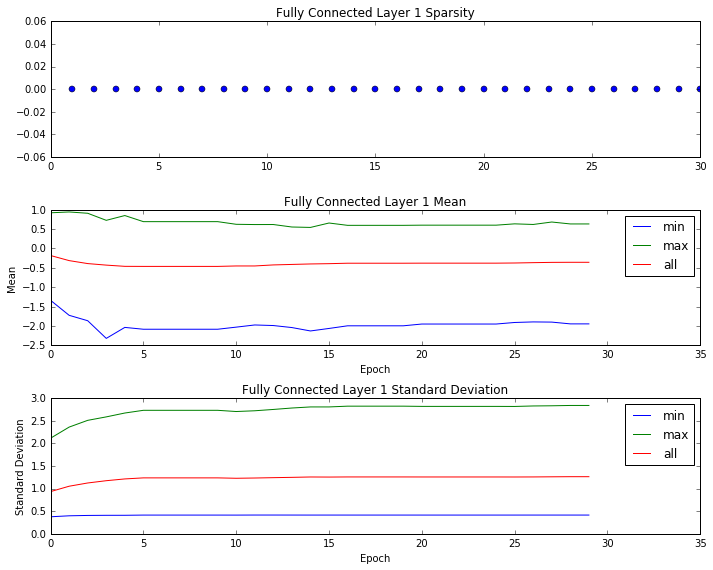

In [6]:
#Fully Connected Layer 1
n = 3
#Sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['fc1']) + 1), layer_sparsity['fc1'], 'bo')
plt.title('Fully Connected Layer 1 Sparsity')

#Mean
plt.subplot(n, 1, 2)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['fc1']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['fc1']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['fc1']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Fully Connected Layer 1 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['fc1']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['fc1']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['fc1']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Fully Connected Layer 1 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

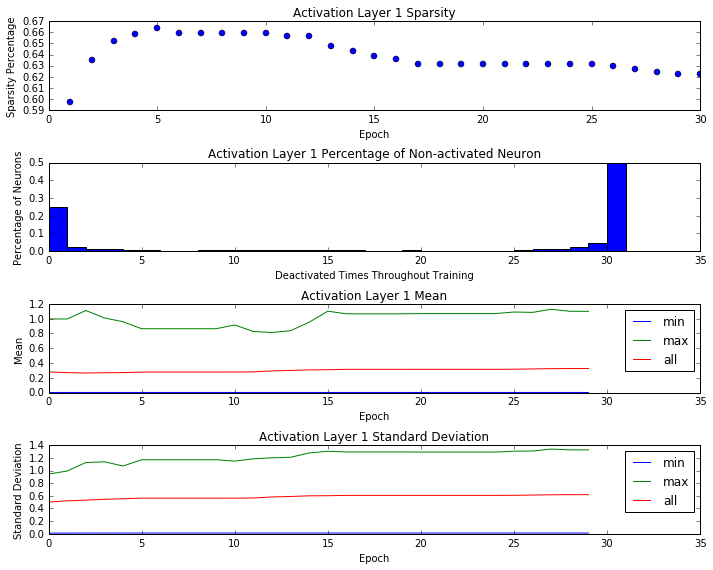

In [7]:
#Activation Layer 1
n = 4
#sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['ac1']) + 1), layer_sparsity['ac1'], 'bo')
plt.title('Activation Layer 1 Sparsity')
plt.xlabel('Epoch')
plt.ylabel('Sparsity Percentage')

# Neuron Death Rate
plt.subplot(n, 1, 2)
plt.bar(range(num_epoch + 1), utils.get_deactivated_scale(layer_deactivated['ac1'], num_epoch), width=1)
plt.title('Activation Layer 1 Percentage of Non-activated Neuron')
plt.xlabel('Deactivated Times Throughout Training')
plt.ylabel('Percentage of Neurons')

#Mean
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['ac1']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['ac1']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['ac1']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Activation Layer 1 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 4)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['ac1']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['ac1']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['ac1']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Activation Layer 1 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

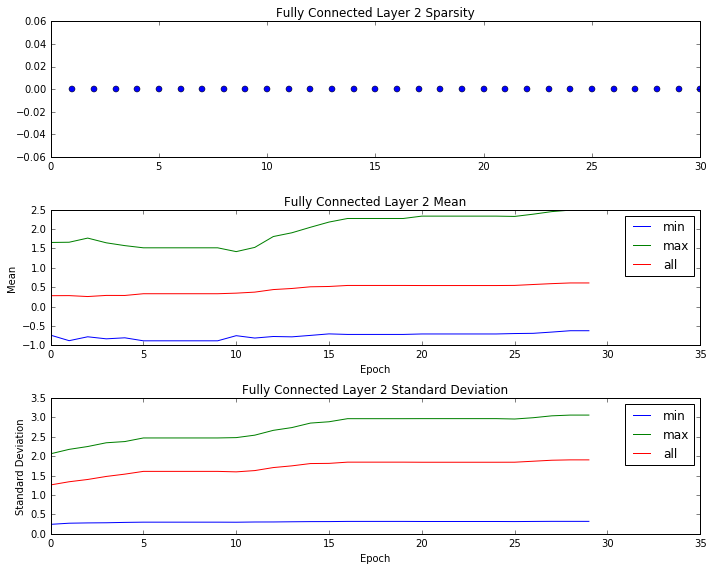

In [8]:
#Fully Connected Layer 2
n = 3
#sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['fc2']) + 1), layer_sparsity['fc2'], 'bo')
plt.title('Fully Connected Layer 2 Sparsity')

#Mean
plt.subplot(n, 1, 2)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['fc2']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['fc2']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['fc2']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Fully Connected Layer 2 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['fc2']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['fc2']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['fc2']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Fully Connected Layer 2 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

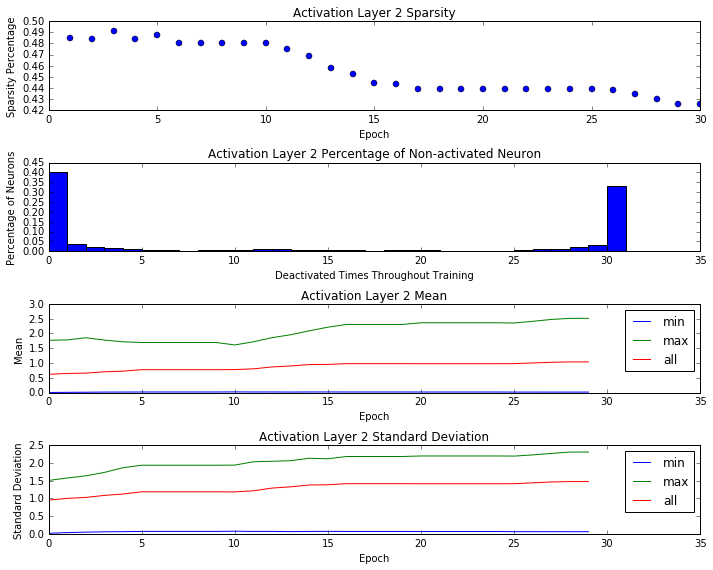

In [9]:
#Activation Layer 2
n = 4
#sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['ac2']) + 1), layer_sparsity['ac2'], 'bo')
plt.title('Activation Layer 2 Sparsity')
plt.xlabel('Epoch')
plt.ylabel('Sparsity Percentage')

# Neuron Death Rate
plt.subplot(n, 1, 2)
plt.bar(range(num_epoch + 1), utils.get_deactivated_scale(layer_deactivated['ac2'], num_epoch), width=1)
plt.title('Activation Layer 2 Percentage of Non-activated Neuron')
plt.xlabel('Deactivated Times Throughout Training')
plt.ylabel('Percentage of Neurons')

#Mean
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['ac2']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['ac2']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['ac2']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Activation Layer 2 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 4)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['ac2']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['ac2']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['ac2']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Activation Layer 2 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

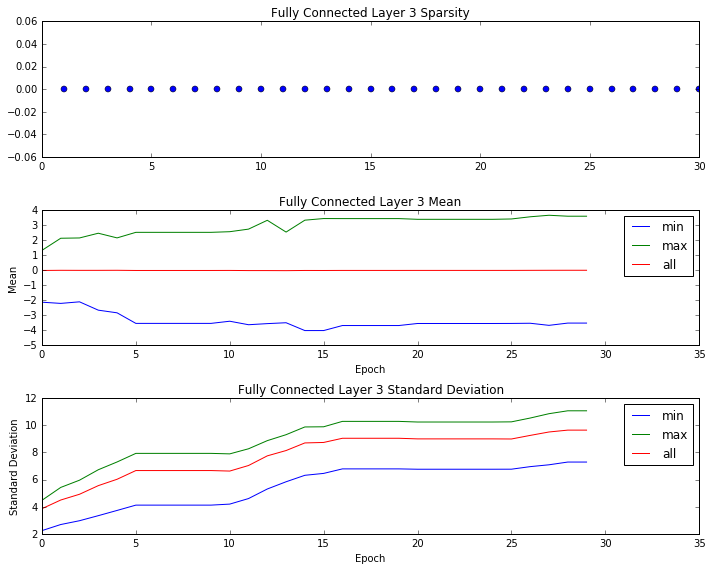

In [10]:
#Fully Connected Layer 3
n = 3
#sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['fc3']) + 1), layer_sparsity['fc3'], 'bo')
plt.title('Fully Connected Layer 3 Sparsity')

#Mean
plt.subplot(n, 1, 2)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['fc3']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['fc3']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['fc3']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Fully Connected Layer 3 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['fc3']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['fc3']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['fc3']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Fully Connected Layer 3 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

In [11]:
#TODO: Current graphs are epoch-wise sampling from a certain batch in one epoch. Do a full epoch 

print 'Program Over Flag'

Program Over Flag
